# Introduction

Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by market capitalization, boasting over 200 million subscribers as of January 2021. For their first order of business, they have been performing some analyses, and they believe that the average duration of movies has been declining.  We now have access to the CSV file, available at the path "datasets/netflix_data.csv". 

In [80]:
# CSV as a DataFrame
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()

netflix_df = pd.read_csv(r'C:\Users\blaks\Downloads\Investigating Netflix Movies and Guest Stars in The Office\datasets\netflix_data.csv')

netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


<Figure size 792x504 with 0 Axes>

Looking at the first five rows of our new DataFrame, we notice a column type. Scanning the column, it's clear there are also TV shows in the dataset! We can select rows where type is Movie. While we're at it, we don't need information from all of the columns, so let's create a new DataFrame netflix_movies containing only title, country, genre, release_year, and duration.

In [81]:
# DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type']=='Movie']

# Columns of interest
netflix_movies_col_subset = netflix_df_movies_only[['title','country','genre','release_year','duration']]

netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


We have read in the raw data, selected rows of movies, and have limited our DataFrame to our columns of interest. Let us try visualizing the data again to inspect the data over a longer range of time. Plot the year of release on the x-axis and the movie duration on the y-axis.

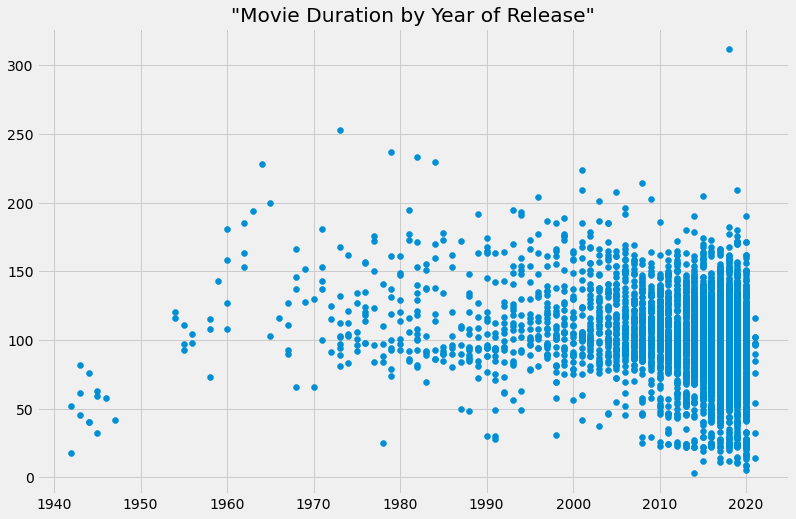

In [82]:
fig = plt.figure(figsize=(12,8))

# Scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'])
plt.title('"Movie Duration by Year of Release"')
plt.show()

We can also see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.

Upon further inspection, something else is going on. Some of these films are under an hour long! Filter our DataFrame for movies with a duration under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.

In [83]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration']<60]

short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster.

Another way to explore the effect of these genres on our data would be to plot them, but mark them with a different color.

In [78]:
# Empty list
colors = []

for i, j in netflix_movies_col_subset.iterrows():
    if netflix_movies_col_subset.loc[i,'genre'] == 'Children':
        colors.append('red')
    elif netflix_movies_col_subset.loc[i,'genre'] == 'Documentaries':
        colors.append('blue')
    elif netflix_movies_col_subset.loc[i,'genre'] =='Stand-Up':
        colors.append('green')
    else:
        colors.append('black')
                
colors[0:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

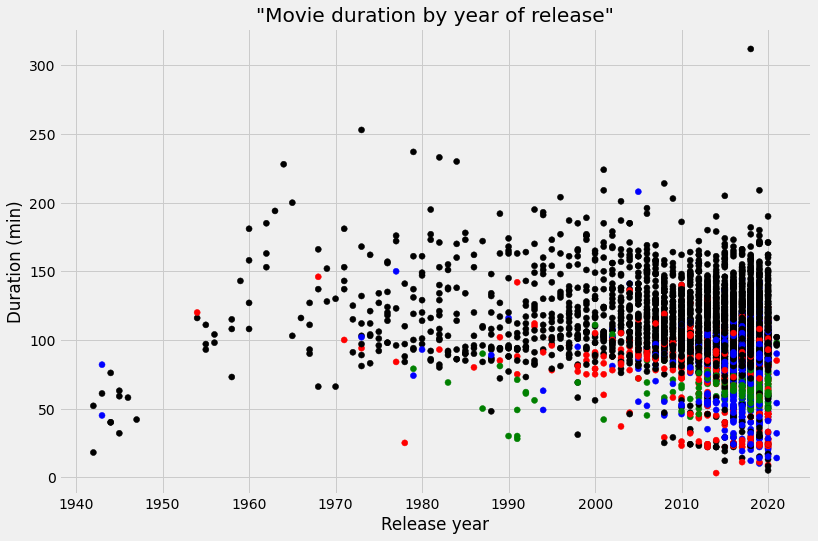

In [84]:
# Initalizing a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'], color = colors)

plt.title('"Movie duration by year of release"')
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.show()

In this part, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: datasets/office_episodes.csv.

Here are the requirements for this part:

1. Create a matplotlib scatter plot of the data that contains the following attributes:

a. Each episode's episode number plotted along the x-axis

b. Each episode's viewership (in millions) plotted along the y-axis

c. A color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that:

i. Ratings < 0.25 are colored "red"

ii. Ratings >= 0.25 and < 0.50 are colored "orange"

iii. Ratings >= 0.50 and < 0.75 are colored "lightgreen"

iv: Ratings >= 0.75 are colored "darkgreen"

d. A sizing system, such that episodes with guest appearances have a marker size of 250 and episodes without are sized 25

e. A title, reading "Popularity, Quality, and Guest Appearances on the Office"

f. An x-axis label reading "Episode Number"

g. A y-axis label reading "Viewership (Millions)"

2. Provide the name of one of the guest stars (hint, there were multiple!) who was in the most watched Office episode. Save it as a string in the variable top_star (e.g. top_star = "Will Ferrell").

In [87]:
df = pd.read_csv(r'C:\Users\blaks\Downloads\Compressed\the_office_series.csv')

df.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


In [86]:
scale = df['Ratings'].max() - df['Ratings'].min()
df['scaled_ratings'] = (df['Ratings'] - df['Ratings'].min())/scale
df = df.rename(columns={"Unnamed: 0": "episode_number", "Viewership":"viewership_mil"})
df.head()

,episode_number,Season,EpisodeTitle,About,Ratings,Votes,viewership_mil,Duration,Date,GuestStars,Director,Writers,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels,0.56250


In [74]:
colors = []
for i,j in df.iterrows():
    if df.loc[i,'scaled_ratings']<0.25:
        colors.append('red')
    elif df.loc[i,'scaled_ratings']>=0.25 and df.loc[i,'scaled_ratings']<0.5:
        colors.append('orange')
    elif df.loc[i,'scaled_ratings']>=0.5 and df.loc[i,'scaled_ratings']<0.75:
        colors.append('lightgreen')
    else:
        colors.append('darkgreen')

In [65]:
size =[]
for i,j in df.iterrows():
    if pd.isnull(df.loc[i,'GuestStars']) == True:
        size.append(25)
    else:
        size.append(250)

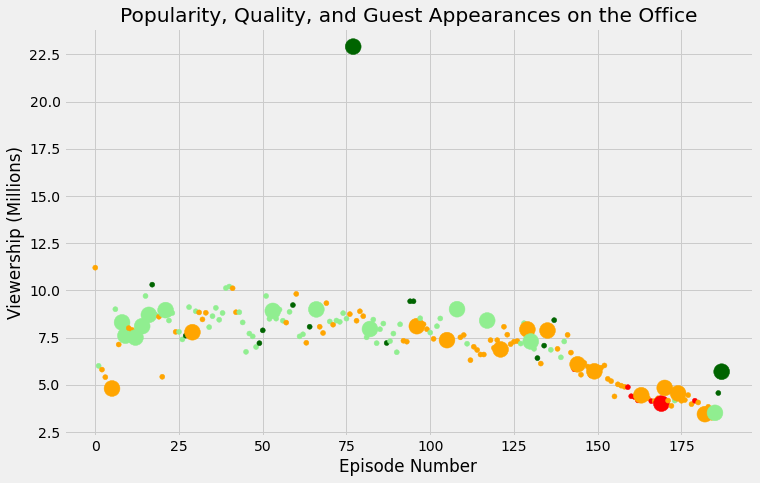

In [75]:
plt.rcParams['figure.figsize'] = [11, 7]
plt.scatter('episode_number','viewership_mil', data=df, s = size, c = colors)
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.show()

In [67]:
df_gs = df[df['viewership_mil'] == max(df['viewership_mil'])]
gs_list = df_gs.loc[77,'GuestStars'].split(',')
top_star = gs_list[0]
top_star

'Cloris Leachman'